In [1]:
import requests
from bs4 import BeautifulSoup
import json
import types
from os import listdir
from os.path import isfile, join
from unidecode import unidecode
import pandas as pd
import codecs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import itertools
import collections
import json
import pickle
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
#### Repetition of words used in lyrics
# From observing wordcloud on '4_lyricAnalysis', it was possible to take a glimpse of trends 
# reciding in lyrics by the comparison of text analysis according to the most popular artist for each yeaqr
# using NLTK, more quantifiable approach will be taken. 
# More specifically, Lexical diversity column for each song will be used. 
# Lexical diversity is a measure of how many different words that are used in a text, while lexical density provides a measure of the proportion of lexical items (i.e. nouns, verbs, adjectives and some adverbs) in the text.

# Resource: https://en.wikipedia.org/wiki/Lexical_diversity
# Resource: https://textinspector.com/help/?page_id=136

In [4]:
DATA_PATH = '../data/'
fname = DATA_PATH + 'billboard_1970_current.csv'
df = pd.read_csv(fname,sep='@')

In [5]:
## Start with cleaning lyrics
df = df[pd.isnull(df.lyric)==False]
df = df[df.lyric!='no lyrics']

In [6]:
# make an array containing word count & unique word count of each song
wordcount_uniq_list=[]
wordcount_list=[]
lexical_diversity_list=[]
counter=0
for song in df.iterrows():
    wordcount_list.append(len(nltk.word_tokenize(song[1]['lyric'])))
    wordcount_uniq_list.append(len(set(nltk.word_tokenize(song[1]['lyric']))))

#### Resource: http://www.nltk.org/book/ch01.html


In [9]:
def lexical_diversity(wordcount_list, wordcount_uniq_list):
    return np.array(wordcount_uniq_list)/np.array(wordcount_list)

In [10]:
l = lexical_diversity(wordcount_list, wordcount_uniq_list)

In [11]:
df['lexdiv']=np.array(wordcount_uniq_list)/np.array(wordcount_list)

In [13]:
lexical_diversity_score = lexical_diversity(wordcount_list, wordcount_uniq_list)

df['wordcount']=wordcount_list
df['wordset']=wordcount_uniq_list
# lexdivs= lexical_diversity(wordcount_list, wordcount_uniq_list)
# np.array(wordcount_uniq_list)/np.array(wordcount_list)

df['lexical_diversity']= lexical_diversity_score
df['rept_score']= 1/lexical_diversity_score


In [14]:
import seaborn as sns
from scipy.stats import linregress

In [38]:
def plotDesign(attribute,plot_year,plot_decade, title):
    x, y = zip(*plot_year.items())
    x_dec, y_dec = zip(*plot_decade.items())
    print("Linear regression slope:", linregress(x,y).slope)
    fig, ax = plt.subplots()
    ax.plot(x_dec,y_dec,color='red',linewidth=2)

    fit = np.polyfit(x,y,1)
    fit_fn = np.poly1d(fit) 

    # https://stackoverflow.com/questions/6148207/linear-regression-with-matplotlib-numpy
    plt.plot(x,y, 'yo', x, fit_fn(x), '--k')

    ax.set(xlabel='Year', ylabel=str(attribute),title = title)
    ax.set_facecolor("white")
    ax.set_clip_on(False)

In [39]:
def plot(df_in, attribute, title):
    years=df_in.groupby('year')
    year_lex= dict()
    for year in years:
        year_lex[year[0]]= year[1][attribute].mean()
    plot_year = collections.OrderedDict(sorted(year_lex.items())) 
    
    decades=df.groupby('decade')
    decade_lex = dict()
    for decade in decades:
        decade_lex[decade[0]] = decade[1][attribute].mean()
    plot_decade = collections.OrderedDict(sorted(decade_lex.items())) 

    plotDesign(attribute,plot_year, plot_decade, title)    

In [40]:
## Heading Word repetition analysis
# Green dot: trend over each year
# Red line: trend over dacades
# Black dotted line: Linear regression 

Linear regression slope: 6.68028181753


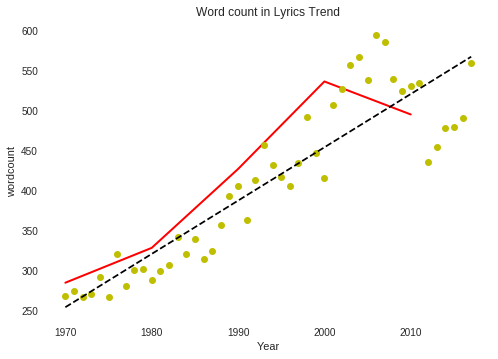

In [41]:
plot(df,'wordcount',"Word count in Lyrics Trend")

Linear regression slope: 1.65091602693


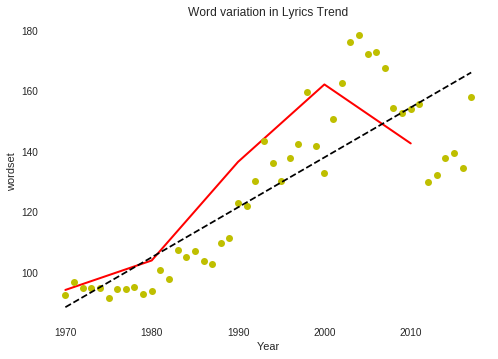

In [19]:
plot(df,'wordset',"Word variation in Lyrics Trend")


Linear regression slope: -0.00168831740921


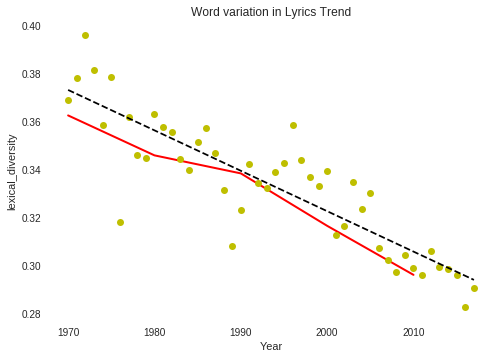

In [20]:
plot(df,'lexical_diversity',"Word variation in Lyrics Trend")


Linear regression slope: 0.0126933889871


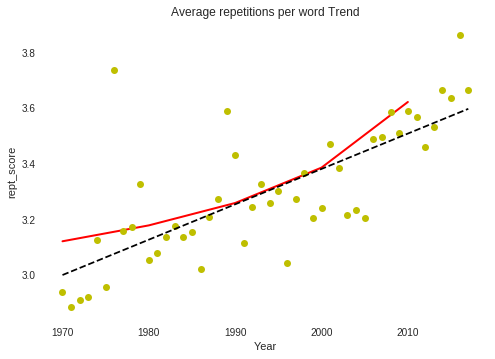

In [21]:
plot(df,'rept_score',"Average repetitions per word Trend")

In [22]:
display(df.sort(columns='rept_score',ascending=False))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Unnamed: 0.1,index,position,year,title,artist,lyric,decade,song_key,lexdiv,wordcount,wordset,lexical_diversity,rept_score
691,691,91,91,92,1976,Tear The Roof Off The Sucker,Parliament,was a Tear the roof off the sucker Tear the r...,1970,1976_92,0.059140,930,55,0.059140,16.909091
2768,2768,68,68,69,1997,Tubthumping,Chumbawamba,"March 27, 2012 was a When we're winning We'll...",1990,1997_69,0.071429,826,59,0.071429,14.000000
2834,2834,34,34,35,1998,Tubthumping,Chumbawamba,"March 27, 2012 was a When we're winning We'll...",1990,1998_35,0.071429,826,59,0.071429,14.000000
1281,1281,81,81,82,1982,Get Down On It,Kool and The Gang,"was a Tell me, what you gonna do? Do you wann...",1980,1982_82,0.076605,966,74,0.076605,13.054054
774,774,74,74,75,1977,Keep It Comin' Love,K.C. and The Sunshine Band,"was a Don't stop it now, don't stop it, no Do...",1970,1977_75,0.082495,497,41,0.082495,12.121951
2012,2012,12,12,13,1990,Pump Up The Jam,Technotronic,was a While your feet are stomping And the ja...,1990,1990_13,0.083824,680,57,0.083824,11.929825
623,623,23,23,24,1976,Get Up And Boogie,Silver Convention,"was a Get up and boogie, get up and boogie (T...",1970,1976_24,0.093333,150,14,0.093333,10.714286
4650,4650,51,51,52,2016,Gold,Kiiara,"was a Roof is falling, let me love me, fallin...",2010,2016_52,0.098996,697,69,0.098996,10.101449
2575,2575,75,75,76,1995,Short Dick Man,20 Fingers feat. Gillette,was a Don't want no short dick man Don't want...,1990,1995_76,0.100443,677,68,0.100443,9.955882
613,613,13,13,14,1976,"Fly, Robin, Fly",Silver Convention,"was a Fly, robin, fly Fly, robin, fly Up, up ...",1970,1976_14,0.101852,108,11,0.101852,9.818182
